<a href="https://colab.research.google.com/github/hanmisil/Fintech_AI_Hackathon/blob/master/AI-Study/RNN-%EC%9E%91%EA%B3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>RNN을 이용한 작곡하기</h1>

구글 드라이브 마운트하기

In [ ]:
from os import path
from google.colab import drive

notebooks_dir_name = 'notebooks'
drive.mount('/content/gdrive')
notebooks_base_dir = path.join('./gdrive/My Drive/', notebooks_dir_name)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/GDL_code-master

/content/gdrive/My Drive/Colab Notebooks/GDL_code-master


music21 사용을 위한 기본 셋팅 <br>
https://colab.research.google.com/gist/mscuthbert/431dee45c01598a0c11bc27823bd1c5b/music21_setup.ipynb

In [ ]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start

     |████████████████████████████████| 18.5MB 1.3MB/s 
  Created wheel for music21: filename=music21-5.7.2-cp36-none-any.whl size=22024602 sha256=95b4a6bec1d48c953563e60168915f412fe1de4e4c3f60be60744636546c9f97
  Stored in directory: /root/.cache/pip/wheels/6e/d0/05/1ef3daa9ae295073d807e468fcd820641965086424f1c633e3
Successfully built music21
  Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu180

In [ ]:
import os
os.putenv('DISPLAY', ':99.0')

In [ ]:
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

In [ ]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

# music21 is Open Source under the BSD License
# Copyright (c) 2006-20 Michael Scott Cuthbert and cuthbertLab
# Support music21 by citing it in your research:
# Cuthbert, Michael Scott.  _music21: a Toolkit for Computer-Aided Music Research_, http://web.mit.edu/music21. 2006-20.

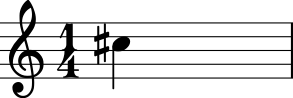

In [ ]:
n = note.Note('C#5')
n.show()

음악 데이터 불러오기 <br>
https://github.com/rickiepark/GDL_code

In [ ]:
from music21 import converter

데이터 확인

In [ ]:
dataset_name = 'cello'
filename = 'cs1-2all'
file = "./data/{}/{}.mid".format(dataset_name, filename)

original_score = converter.parse(file).chordify()

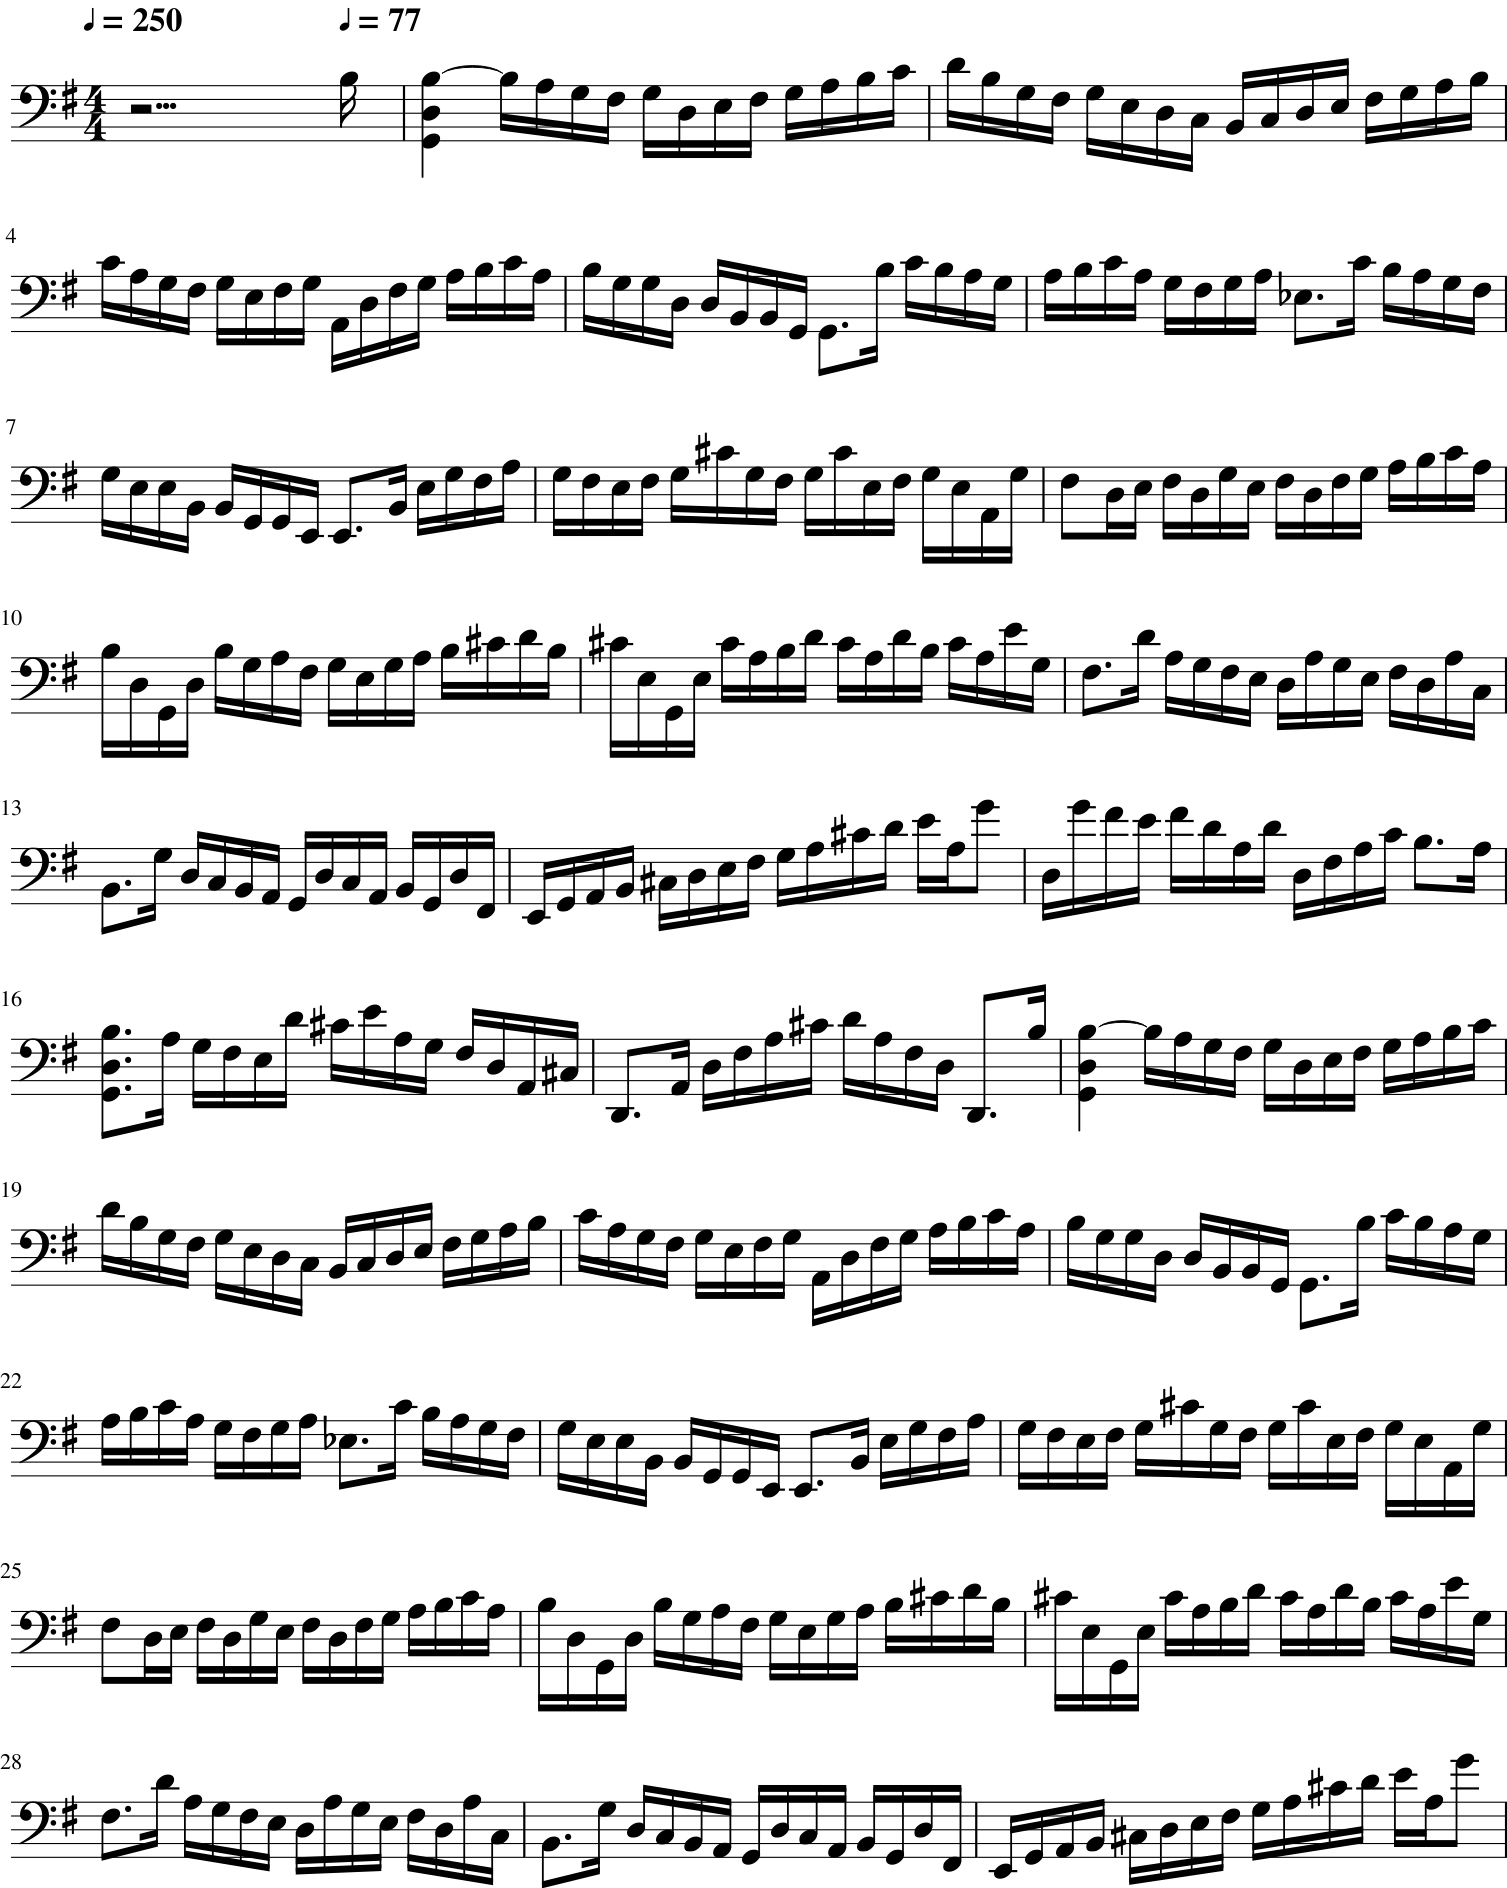

In [ ]:
original_score.show()

데이터 추출

In [ ]:
from music21 import chord, note

In [ ]:
notes = []
durations = []

for element in original_score.flat:

    if isinstance(element, chord.Chord):
        notes.append('.'.join(n.nameWithOctave for n in element.pitches))
        durations.append(element.duration.quarterLength)

    if isinstance(element, note.Note):
        if element.isRest:
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
        else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

In [ ]:
print('\nduration', 'pitch')
for n,d in zip(notes,durations):
    print(d, '\t', n)


duration pitch
0.25 	 B3
1.0 	 G2.D3.B3
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 D3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 D4
0.25 	 B3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 D3
0.25 	 C3
0.25 	 B2
0.25 	 C3
0.25 	 D3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A2
0.25 	 D3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 B3
0.25 	 G3
0.25 	 G3
0.25 	 D3
0.25 	 D3
0.25 	 B2
0.25 	 B2
0.25 	 G2
0.75 	 G2
0.25 	 B3
0.25 	 C4
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.75 	 E-3
0.25 	 C4
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 E3
0.25 	 B2
0.25 	 B2
0.25 	 G2
0.25 	 G2
0.25 	 E2
0.75 	 E2
0.25 	 B2
0.25 	 E3
0.25 	 G3
0.25 	 F#3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 C#4
0.25 	 G3
0.25 	 F#3
0.25

In [ ]:
import os
import pickle
import numpy
from music21 import note, chord

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model

from models.RNNAttention import get_distinct, create_lookups, prepare_sequences, get_music_list, create_network

Using TensorFlow backend.


파라미터 설정

In [ ]:
# 실행 파라미터
section = 'compose'
run_id = '0006_1'
music_name = 'cello'

run_folder = 'run/{}/'.format(section)
run_folder += '_'.join([run_id, music_name])


store_folder = os.path.join(run_folder, 'store')
data_folder = os.path.join('data', music_name)

if not os.path.exists(run_folder):
    os.mkdir(run_folder)
    os.mkdir(os.path.join(run_folder, 'store'))
    os.mkdir(os.path.join(run_folder, 'output'))
    os.mkdir(os.path.join(run_folder, 'weights'))
    os.mkdir(os.path.join(run_folder, 'viz'))



mode = 'build' # 'load' #

# 데이터 파라미터
intervals = range(1)
seq_len = 32

# 하이퍼퍼라미터
embed_size = 100
rnn_units = 256
use_attention = False

악보 추출

In [ ]:
if mode == 'build':

    music_list, parser = get_music_list(data_folder)
    print(len(music_list), 'files in total')

    notes = []
    durations = []

    for i, file in enumerate(music_list):
        print(i+1, "Parsing %s" % file)
        # 악보데이터 추출, music21 라이브러리를 사용하여 미디 파일 불러와 전처리
        original_score = parser.parse(file).chordify()


        for interval in intervals:

            score = original_score.transpose(interval)

            notes.extend(['START'] * seq_len)
            durations.extend([0]* seq_len)

            for element in score.flat:

                if isinstance(element, note.Note):
                    if element.isRest:
                        notes.append(str(element.name))
                        durations.append(element.duration.quarterLength)
                    else:
                        notes.append(str(element.nameWithOctave))
                        durations.append(element.duration.quarterLength)

                if isinstance(element, chord.Chord):
                    notes.append('.'.join(n.nameWithOctave for n in element.pitches))
                    durations.append(element.duration.quarterLength)

    with open(os.path.join(store_folder, 'notes'), 'wb') as f:
        pickle.dump(notes, f) #['G2', 'D3', 'B3', 'A3', 'B3', 'D3', 'B3', 'D3', 'G2',...]
    with open(os.path.join(store_folder, 'durations'), 'wb') as f:
        pickle.dump(durations, f)
else:
    with open(os.path.join(store_folder, 'notes'), 'rb') as f:
        notes = pickle.load(f) #['G2', 'D3', 'B3', 'A3', 'B3', 'D3', 'B3', 'D3', 'G2',...]
    with open(os.path.join(store_folder, 'durations'), 'rb') as f:
        durations = pickle.load(f)

1 files in total
1 Parsing data/cello/cs1-2all.mid


In [ ]:
sorted(set(notes)), len(sorted(set(notes)))

(['A2',
  'A2.E3.A3',
  'A2.E3.C4',
  'A3',
  'B-3',
  'B2',
  'B3',
  'C#3',
  'C#4',
  'C3',
  'C4',
  'D2',
  'D3',
  'D3.A3',
  'D4',
  'E-3',
  'E2',
  'E3',
  'E3.A3',
  'E3.B3',
  'E4',
  'F#2',
  'F#3',
  'F#4',
  'F3',
  'F4',
  'G#2',
  'G#3',
  'G2',
  'G2.D3.B3',
  'G3',
  'G4',
  'START'],
 33)

<h>룩업 테이블 만들기</h1><br>
- 모델 훈련을 위한 데이터셋을 만들기 위해 피치와 박자를 정숫값으로 변환

In [ ]:
# 고유한 음표와 박자 얻어오기
note_names, n_notes = get_distinct(notes)
# get_distinct안의 sorted(set())을 사용하여 중복을 제외한 값들과 길이 리턴
duration_names, n_durations = get_distinct(durations)
distincts = [note_names, n_notes, duration_names, n_durations]

with open(os.path.join(store_folder, 'distincts'), 'wb') as f:
    # 일반 텍스트 이외의 자료형을 파일로 저장하기 위하여 pickle이라는 모듈을 사용
    pickle.dump(distincts, f)


# 음표와 박자 룩업 딕셔너리 만들고 저장하기
note_to_int, int_to_note = create_lookups(note_names)
duration_to_int, int_to_duration = create_lookups(duration_names)
lookups = [note_to_int, int_to_note, duration_to_int, int_to_duration]

with open(os.path.join(store_folder, 'lookups'), 'wb') as f:
    pickle.dump(lookups, f)

In [ ]:
print('\nnote_to_int')
note_to_int


note_to_int


{'A2': 0,
 'A2.E3.A3': 1,
 'A2.E3.C4': 2,
 'A3': 3,
 'B-3': 4,
 'B2': 5,
 'B3': 6,
 'C#3': 7,
 'C#4': 8,
 'C3': 9,
 'C4': 10,
 'D2': 11,
 'D3': 12,
 'D3.A3': 13,
 'D4': 14,
 'E-3': 15,
 'E2': 16,
 'E3': 17,
 'E3.A3': 18,
 'E3.B3': 19,
 'E4': 20,
 'F#2': 21,
 'F#3': 22,
 'F#4': 23,
 'F3': 24,
 'F4': 25,
 'G#2': 26,
 'G#3': 27,
 'G2': 28,
 'G2.D3.B3': 29,
 'G3': 30,
 'G4': 31,
 'START': 32}

In [ ]:
print('\nduration_to_int')
duration_to_int


duration_to_int


{0: 0, 0.25: 1, 0.5: 2, Fraction(2, 3): 3, 0.75: 4, 1.0: 5, 1.25: 6}

In [ ]:
notes[10:10 + seq_len]

['START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'B3',
 'G2.D3.B3',
 'B3',
 'A3',
 'G3',
 'F#3',
 'G3',
 'D3',
 'E3',
 'F#3']

In [ ]:
notes[10 + seq_len]

'G3'

In [ ]:
len(notes)-seq_len

916

신경망에 사용할 시퀀스 준비하기

In [ ]:
#
network_input, network_output = prepare_sequences(notes, durations, lookups, distincts, seq_len)

In [ ]:
print('pitch input')
print(network_input[0][10])
print('duration input')
print(network_input[1][10])
print('pitch output')
print(network_output[0][10])
print('duration output')
print(network_output[1][10])

pitch input
[32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32  6 29
  6  3 30 22 30 12 17 22]
duration input
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 5 1 1 1 1 1 1 1 1]
pitch output
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0.]
duration output
[0. 1. 0. 0. 0. 0. 0.]


In [ ]:
n_notes, n_durations

(33, 7)

신경망 만들기

In [ ]:
model, att_model = create_network(n_notes, n_durations, embed_size, rnn_units, use_attention)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    3300        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    700         input_2[0][0]                    
____________________________________________________________________________________________

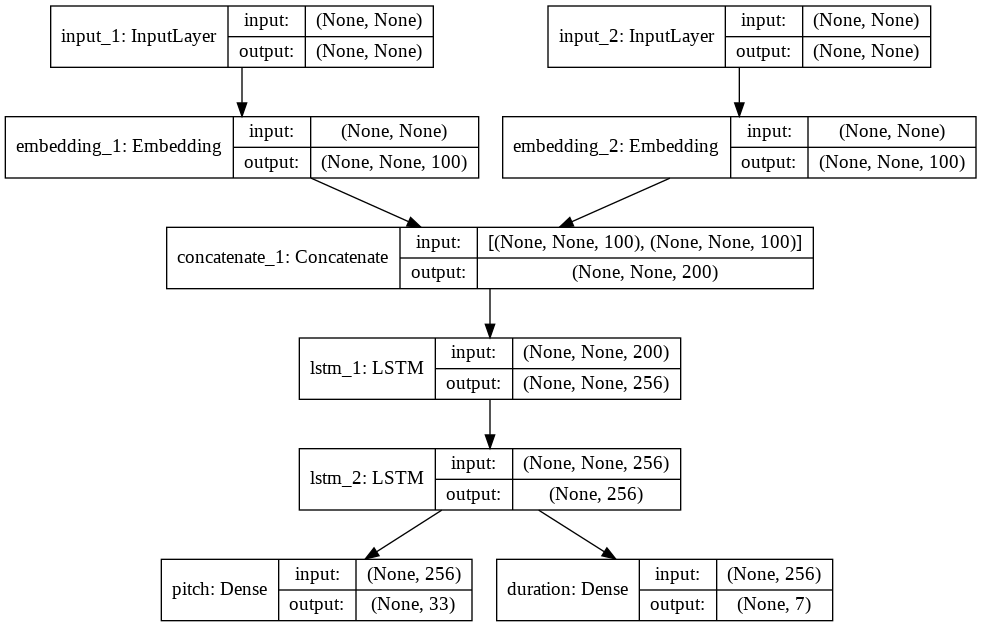

In [ ]:
plot_model(model, to_file=os.path.join(run_folder ,'viz/model.png'), show_shapes = True, show_layer_names = True)

신경망 훈련하기

In [ ]:
weights_folder = os.path.join(run_folder, 'weights')
# model.load_weights(os.path.join(weights_folder, "weights.h5"))

In [ ]:
# 어텐션을 사용
weights_folder = os.path.join(run_folder, 'weights')

checkpoint1 = ModelCheckpoint(
    os.path.join(weights_folder, "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

# monitor : 관찰하고자 하는 항목(val_loss나 val_acc가 주로 사용)
# patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인지 가를 지정함
# 만약 10 에폭이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료
checkpoint2 = ModelCheckpoint(
    os.path.join(weights_folder, "weights.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='loss'
    , restore_best_weights=True
    , patience = 10
)

callbacks_list = [
    checkpoint1
    , checkpoint2
    , early_stopping
 ]

model.save_weights(os.path.join(weights_folder, "weights.h5"))
model.fit(network_input, network_output
          , epochs=2000000, batch_size=32
          , validation_split = 0.2
          , callbacks=callbacks_list
          , shuffle=True
         )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 732 samples, validate on 184 samples
Epoch 1/2000000
732/732 [==============================] - 7s 10ms/step - loss: 3.4193 - pitch_loss: 2.9686 - duration_loss: 0.4543 - val_loss: 3.4355 - val_pitch_loss: 3.0125 - val_duration_loss: 0.4259
Epoch 2/2000000
732/732 [==============================] - 5s 6ms/step - loss: 3.1436 - pitch_loss: 2.8254 - duration_loss: 0.3159 - val_loss: 3.3974 - val_pitch_loss: 2.9769 - val_duration_loss: 0.4306
Epoch 3/2000000
732/732 [==============================] - 5s 6ms/step - loss: 3.1548 - pitch_loss: 2.8191 - duration_loss: 0.3358 - val_loss: 3.3480 - val_pitch_loss: 2.9400 - val_duration_loss: 0.4158
Epoch 4/2000000
732/732 [==============================] - 5s 6ms/step - loss: 3.1673 - pitch_loss: 2.8121 - duration_loss: 0.3543 - val_loss: 3.3082 - val_pitch_loss: 2.9205 - val_duration_loss: 0.4007
Epoch 5/2000000
732/732 [==============================] - 5s 6ms/step - loss: 3.0646 - pitch_loss: 2.7536 - duration_loss: 0.3115 - val_loss

In [ ]:
# 어텐션 사용하지 않을 때
weights_folder = os.path.join(run_folder, 'weights')

In [ ]:
weights_folder

'run/compose/0006_1_cello/weights'

In [ ]:
# 어텐션 사용하지 않을 때
weights_folder = os.path.join(run_folder, 'weights')

checkpoint1 = ModelCheckpoint(
    os.path.join(weights_folder, "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

# monitor : 관찰하고자 하는 항목(val_loss나 val_acc가 주로 사용)
# patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인지 가를 지정함
# 만약 10에폭이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료
checkpoint2 = ModelCheckpoint(
    os.path.join(weights_folder, "weights.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='loss'
    , restore_best_weights=True
    , patience = 10
)

callbacks_list = [
    checkpoint1
    , checkpoint2
    , early_stopping
 ]

att_model.save_weights(os.path.join(weights_folder, "weights.h5"))

att_model.fit(network_input, network_output
          , epochs=2000000, batch_size=32
          , validation_split = 0.2
          , callbacks=callbacks_list
          , shuffle=True
         )

AttributeError: ignored

7.03_어텐션 사용

In [ ]:
import pickle as pkl
import time
import os
import numpy as np
import sys
from music21 import instrument, note, stream, chord, duration
from models.RNNAttention import create_network, sample_with_temp

import matplotlib.pyplot as plt

In [ ]:
# 예측용 파라미터
notes_temp=0.5
duration_temp = 0.5
max_extra_notes = 50
max_seq_len = 32
seq_len = 32

# notes = ['START', 'D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3']
# durations = [0, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2]


# notes = ['START', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3','F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3']
# durations = [0, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2]


notes = ['START']
durations = [0]

if seq_len is not None:
    notes = ['START'] * (seq_len - len(notes)) + notes
    durations = [0] * (seq_len - len(durations)) + durations


sequence_length = len(notes)

악보 시퀀스를 기반으로 신경망에서 악보 생성하기

In [ ]:
prediction_output = []
notes_input_sequence = []
durations_input_sequence = []

overall_preds = []

for n, d in zip(notes,durations):
    note_int = note_to_int[n]
    duration_int = duration_to_int[d]

    notes_input_sequence.append(note_int)
    durations_input_sequence.append(duration_int)

    prediction_output.append([n, d])

    if n != 'START':
        midi_note = note.Note(n)

        new_note = np.zeros(128)
        new_note[midi_note.pitch.midi] = 1
        overall_preds.append(new_note)


att_matrix = np.zeros(shape = (max_extra_notes+sequence_length, max_extra_notes))

for note_index in range(max_extra_notes):

    prediction_input = [
        np.array([notes_input_sequence])
        , np.array([durations_input_sequence])
       ]

    notes_prediction, durations_prediction = model.predict(prediction_input, verbose=0)
    if use_attention:
        att_prediction = att_model.predict(prediction_input, verbose=0)[0]
        att_matrix[(note_index-len(att_prediction)+sequence_length):(note_index+sequence_length), note_index] = att_prediction

    new_note = np.zeros(128)

    for idx, n_i in enumerate(notes_prediction[0]):
        try:
            note_name = int_to_note[idx]
            midi_note = note.Note(note_name)
            new_note[midi_note.pitch.midi] = n_i

        except:
            pass

    overall_preds.append(new_note)


    i1 = sample_with_temp(notes_prediction[0], notes_temp)
    i2 = sample_with_temp(durations_prediction[0], duration_temp)


    note_result = int_to_note[i1]
    duration_result = int_to_duration[i2]

    prediction_output.append([note_result, duration_result])

    notes_input_sequence.append(i1)
    durations_input_sequence.append(i2)

    if len(notes_input_sequence) > max_seq_len:
        notes_input_sequence = notes_input_sequence[1:]
        durations_input_sequence = durations_input_sequence[1:]

#     print(note_result)
#     print(duration_result)

    if note_result == 'START':
        break

overall_preds = np.transpose(np.array(overall_preds))
print('Generated sequence of {} notes'.format(len(prediction_output)))

In [ ]:
prediction_output

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_yticks([int(j) for j in range(35,70)])

plt.imshow(overall_preds[35:70,:], origin="lower", cmap='coolwarm', vmin = -0.5, vmax = 0.5, extent=[0, max_extra_notes, 35,70]

          )

In [ ]:
predict = converter.parse('run/compose/0006_cello/output/output-20200717-021023.mid')
predict.show()

예측 출력을 악보로 변환하고 악보에서 미디 파일 만들기

In [ ]:
output_folder = os.path.join(run_folder, 'output')

midi_stream = stream.Stream()

# 모델이 생성한 값을 기반으로 악보와 화음 객체 만들기
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # 패턴이 화음일 경우
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        midi_stream.append(new_chord)
    elif note_pattern == 'rest':
    # 패턴이 쉼표일 경우
        new_note = note.Rest()
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern != 'START':
    # 패턴이 하나의 음표일 경우
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)



midi_stream = midi_stream.chordify()
timestr = time.strftime("%Y%m%d-%H%M%S")
midi_stream.write('midi', fp=os.path.join(output_folder, 'output-' + timestr + '.mid'))

In [ ]:
## 어텐션 그래프
if use_attention:
    fig, ax = plt.subplots(figsize=(20,20))

    im = ax.imshow(att_matrix[(seq_len-2):,], cmap='coolwarm', interpolation='nearest')




    # Minor ticks
    ax.set_xticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)




    # We want to show all ticks...
    ax.set_xticks(np.arange(len(prediction_output) - seq_len))
    ax.set_yticks(np.arange(len(prediction_output)- seq_len+2))
    # ... and label them with the respective list entries
    ax.set_xticklabels([n[0] for n in prediction_output[(seq_len):]])
    ax.set_yticklabels([n[0] for n in prediction_output[(seq_len - 2):]])

    # ax.grid(color='black', linestyle='-', linewidth=1)

    ax.xaxis.tick_top()



    plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va = "center",
             rotation_mode="anchor")

    plt.show()